# Notebook 1 — Data Profiling & DQ Assessment

**Objectives**: Understand dataset structure, profile all columns, assess DQ dimensions, identify issues

**Topics Covered**: 1-4 (DQ Foundations, Dimensions, Assessment, Profiling)

**Note**: This notebook is DIAGNOSTIC ONLY - no data cleaning will be performed here.

## 1.1 — Dataset Overview

In [2]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
# Cell 2: Load dataset
print("="*80)
print("SECTION 1.1: DATASET OVERVIEW")
print("="*80)

# Load data
df = pd.read_csv('met_museum_objects.csv', low_memory=False)

# Basic information
print(f"\n📊 Dataset Shape:")
print(f"   • Rows: {df.shape[0]:,}")
print(f"   • Columns: {df.shape[1]}")
print(f"   • Total cells: {df.shape[0] * df.shape[1]:,}")

# Memory usage
memory_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"\n💾 Memory Usage:")
print(f"   • Total: {memory_mb:.2f} MB")
print(f"   • Per row: {memory_mb / len(df) * 1024:.2f} KB")

# Data types
print(f"\n📝 Data Types:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   • {dtype}: {count} columns")

print("\n" + "="*80)

SECTION 1.1: DATASET OVERVIEW

📊 Dataset Shape:
   • Rows: 448,203
   • Columns: 43
   • Total cells: 19,272,729

💾 Memory Usage:
   • Total: 919.34 MB
   • Per row: 2.10 KB

📝 Data Types:
   • object: 38 columns
   • int64: 3 columns
   • bool: 2 columns



In [4]:
# Cell 3: Column inventory
print("\n📋 COLUMN INVENTORY (43 columns):\n")

column_info = pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.values,
    'Non-Null': df.count().values,
    'Null': df.isnull().sum().values,
    'Null %': (df.isnull().sum() / len(df) * 100).values
})

column_info['Null %'] = column_info['Null %'].round(2)
column_info = column_info.sort_values('Null %', ascending=False).reset_index(drop=True)

# Display with formatting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(column_info.to_string(index=False))

# Summary
print(f"\n📊 Summary:")
print(f"   • Columns with 0% missing: {(column_info['Null %'] == 0).sum()}")
print(f"   • Columns with >50% missing: {(column_info['Null %'] > 50).sum()}")
print(f"   • Columns with >95% missing: {(column_info['Null %'] > 95).sum()}")


📋 COLUMN INVENTORY (43 columns):

                 Column   Type  Non-Null   Null  Null %
                  River object      2103 446100   99.53
                 County object      2488 445715   99.44
                  Locus object      6939 441264   98.45
                  State object      8360 439843   98.13
          Artist Suffix object     10212 437991   97.72
                  Reign object     10817 437386   97.59
                 Locale object     15095 433108   96.63
             Excavation object     15519 432684   96.54
              Portfolio object     20370 427833   95.46
              Subregion object     21716 426487   95.15
Rights and Reproduction object     22975 425228   94.87
                Dynasty object     23018 425185   94.86
                   City object     30520 417683   93.19
                 Region object     31078 417125   93.07
         Geography Type object     58463 389740   86.96
                 Period object     71882 376321   83.96
             

In [5]:
# Cell 4: Preview data
print("\n🔍 First 5 Rows Preview:\n")
print(df.head())

print("\n🔍 Random 3 Rows Sample:\n")
print(df.sample(3, random_state=42))


🔍 First 5 Rows Preview:

  Object Number  Is Highlight  Is Public Domain  Object ID  \
0    1979.486.1         False             False          1   
1    1980.264.5         False             False          2   
2      67.265.9         False             False          3   
3     67.265.10         False             False          4   
4     67.265.11         False             False          5   

                 Department Object Name                         Title Culture  \
0  American Decorative Arts        Coin  One-dollar Liberty Head Coin     NaN   
1  American Decorative Arts        Coin  Ten-dollar Liberty Head Coin     NaN   
2  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   
3  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   
4  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   

  Period Dynasty Reign Portfolio Artist Role Artist Prefix  \
0    NaN     NaN   NaN       NaN       Maker        

## 1.2 — Data Profiling

### 1.2.1 — Missing Values Analysis

In [6]:
# Cell 5: Missing values deep dive
print("="*80)
print("SECTION 1.2: DATA PROFILING")
print("="*80)
print("\n1.2.1 - Missing Values Analysis\n")

# Calculate missing statistics
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Pct': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
})

missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values(
    'Missing_Pct', ascending=False
).reset_index(drop=True)

print(f"Columns with missing values: {len(missing_stats)}/{len(df.columns)}\n")
print(missing_stats.to_string(index=False))

# Categorize by missingness
print(f"\n📊 Missingness Categories:")
print(f"   • Extreme (>95%): {(missing_stats['Missing_Pct'] > 95).sum()} columns")
print(f"   • High (75-95%): {((missing_stats['Missing_Pct'] > 75) & (missing_stats['Missing_Pct'] <= 95)).sum()} columns")
print(f"   • Medium (25-75%): {((missing_stats['Missing_Pct'] > 25) & (missing_stats['Missing_Pct'] <= 75)).sum()} columns")
print(f"   • Low (<25%): {(missing_stats['Missing_Pct'] <= 25).sum()} columns")

SECTION 1.2: DATA PROFILING

1.2.1 - Missing Values Analysis

Columns with missing values: 33/43

                 Column  Missing_Count  Missing_Pct Data_Type
                  River         446100    99.530793    object
                 County         445715    99.444894    object
                  Locus         441264    98.451818    object
                  State         439843    98.134774    object
          Artist Suffix         437991    97.721568    object
                  Reign         437386    97.586585    object
                 Locale         433108    96.632106    object
             Excavation         432684    96.537506    object
              Portfolio         427833    95.455184    object
              Subregion         426487    95.154874    object
Rights and Reproduction         425228    94.873975    object
                Dynasty         425185    94.864381    object
                   City         417683    93.190586    object
                 Region         41

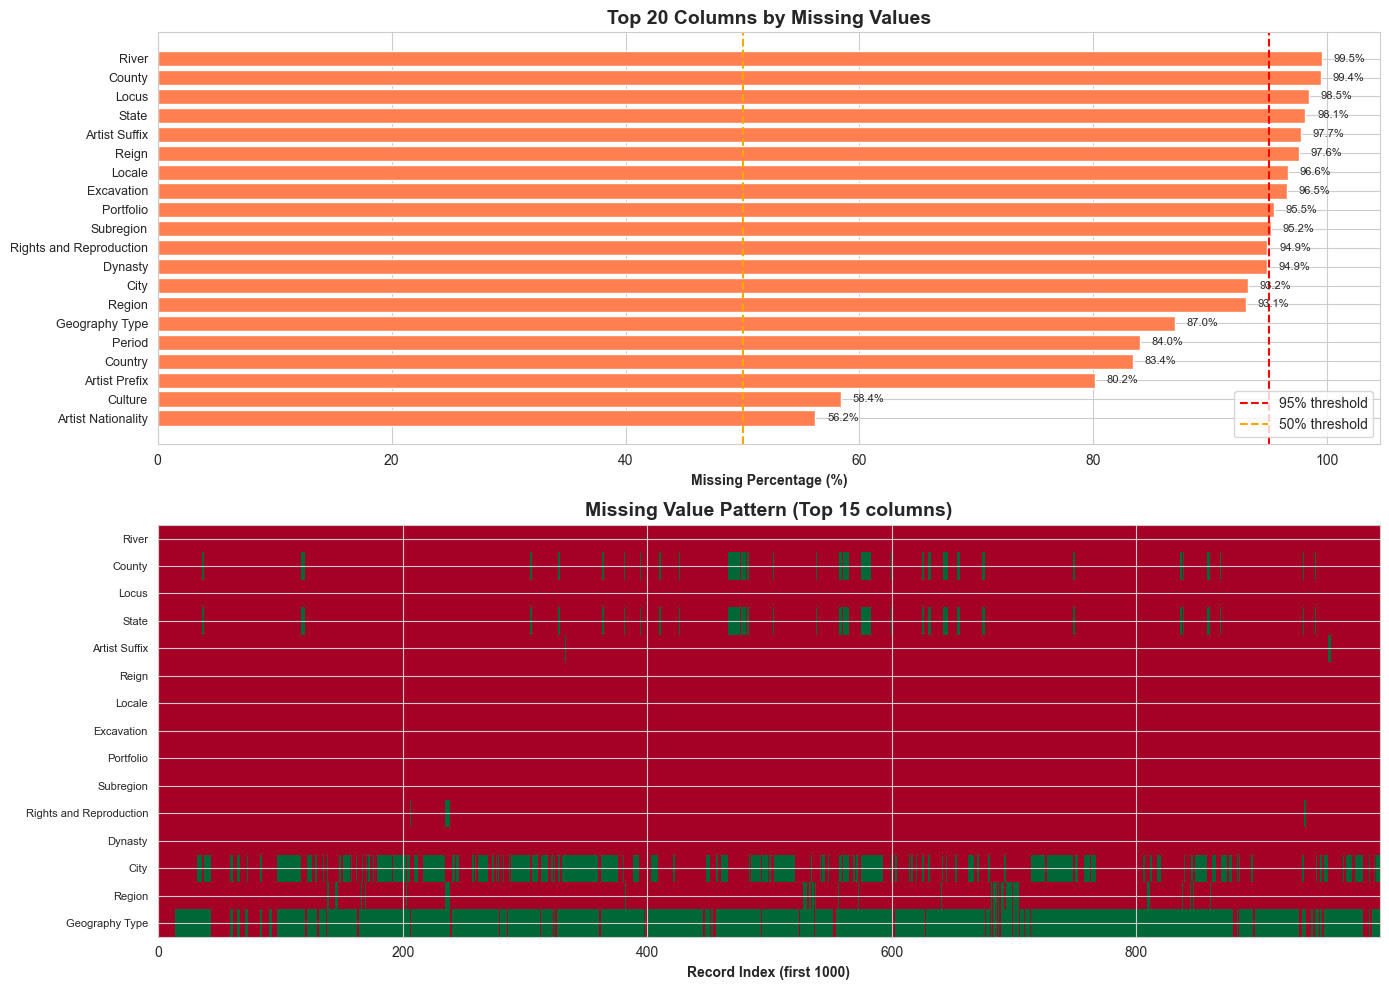

✓ Saved: missing_values_analysis.png


In [7]:
# Cell 6: Visualize missing values
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Missing value heatmap
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
top_missing = missing_pct[missing_pct > 0].head(20)

axes[0].barh(range(len(top_missing)), top_missing.values, color='coral')
axes[0].set_yticks(range(len(top_missing)))
axes[0].set_yticklabels(top_missing.index, fontsize=9)
axes[0].set_xlabel('Missing Percentage (%)', fontweight='bold')
axes[0].set_title('Top 20 Columns by Missing Values', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].axvline(x=95, color='red', linestyle='--', label='95% threshold')
axes[0].axvline(x=50, color='orange', linestyle='--', label='50% threshold')
axes[0].legend()

# Add value labels
for i, v in enumerate(top_missing.values):
    axes[0].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=8)

# Plot 2: Missing value patterns (sample)
sample_cols = missing_pct[missing_pct > 0].head(15).index
missing_matrix = df[sample_cols].isnull().astype(int).iloc[:1000]  # Sample first 1000 rows

axes[1].imshow(missing_matrix.T, cmap='RdYlGn_r', aspect='auto', interpolation='nearest')
axes[1].set_yticks(range(len(sample_cols)))
axes[1].set_yticklabels(sample_cols, fontsize=8)
axes[1].set_xlabel('Record Index (first 1000)', fontweight='bold')
axes[1].set_title('Missing Value Pattern (Top 15 columns)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: missing_values_analysis.png")

### 1.2.2 — Categorical Variables Profiling

In [8]:
# Cell 7: Profile key categorical columns
print("\n1.2.2 - Categorical Variables Profiling\n")

categorical_cols = ['Department', 'Classification', 'Culture', 'Period', 
                    'Object Name', 'Medium', 'Country', 'Region']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{'='*60}")
        print(f"Column: {col}")
        print(f"{'='*60}")
        
        # Basic stats
        total = len(df)
        non_null = df[col].notna().sum()
        unique = df[col].nunique()
        
        print(f"Non-null values: {non_null:,} ({non_null/total*100:.1f}%)")
        print(f"Unique values: {unique:,}")
        
        # Top values
        print(f"\nTop 10 values:")
        value_counts = df[col].value_counts().head(10)
        for val, count in value_counts.items():
            pct = count / total * 100
            val_str = str(val)[:50] if pd.notna(val) else 'NaN'
            print(f"  • {val_str:<50} {count:>8,} ({pct:>5.1f}%)")
        
        # Long tail analysis
        if unique > 10:
            top10_coverage = value_counts.sum() / non_null * 100
            print(f"\nTop 10 coverage: {top10_coverage:.1f}% of non-null values")
            print(f"Long tail: {unique - 10:,} additional values")


1.2.2 - Categorical Variables Profiling


Column: Department
Non-null values: 448,203 (100.0%)
Unique values: 20

Top 10 values:
  • Drawings and Prints                                 154,445 ( 34.5%)
  • European Sculpture and Decorative Arts               42,528 (  9.5%)
  • Asian Art                                            36,727 (  8.2%)
  • Photographs                                          36,258 (  8.1%)
  • Costume Institute                                    33,681 (  7.5%)
  • Egyptian Art                                         27,542 (  6.1%)
  • Greek and Roman Art                                  17,292 (  3.9%)
  • Islamic Art                                          15,082 (  3.4%)
  • Modern and Contemporary Art                          13,991 (  3.1%)
  • Arms and Armor                                       13,486 (  3.0%)

Top 10 coverage: 87.2% of non-null values
Long tail: 10 additional values

Column: Classification
Non-null values: 389,924 (87.0%)
Unique v

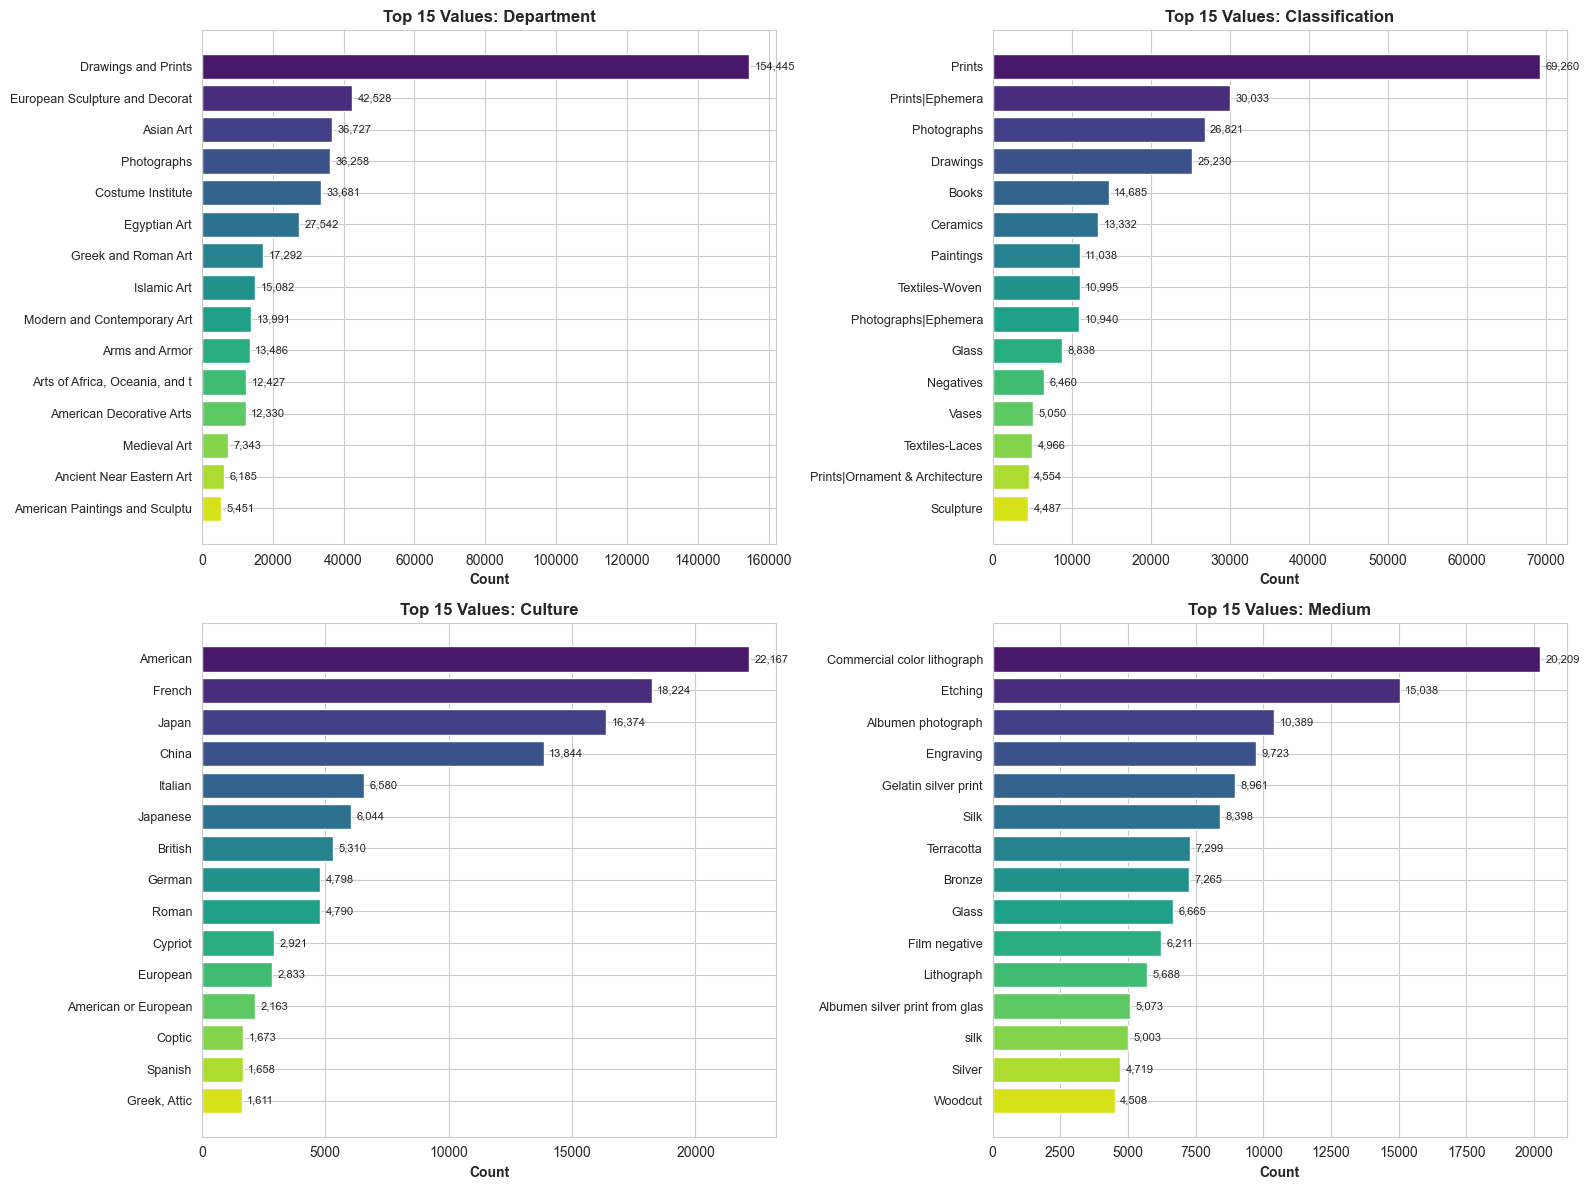

✓ Saved: categorical_distributions.png


In [9]:
# Cell 8: Visualize categorical distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

viz_cols = ['Department', 'Classification', 'Culture', 'Medium']

for idx, col in enumerate(viz_cols):
    if col in df.columns:
        top_values = df[col].value_counts().head(15)
        
        axes[idx].barh(range(len(top_values)), top_values.values, 
                       color=sns.color_palette("viridis", len(top_values)))
        axes[idx].set_yticks(range(len(top_values)))
        axes[idx].set_yticklabels([str(x)[:30] for x in top_values.index], fontsize=9)
        axes[idx].set_xlabel('Count', fontweight='bold')
        axes[idx].set_title(f'Top 15 Values: {col}', fontsize=12, fontweight='bold')
        axes[idx].invert_yaxis()
        
        # Add value labels
        for i, v in enumerate(top_values.values):
            axes[idx].text(v + max(top_values.values)*0.01, i, f'{v:,}', 
                          va='center', fontsize=8)

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: categorical_distributions.png")

### 1.2.3 — Numeric Variables Profiling

In [10]:
# Cell 9: Profile numeric columns
print("\n1.2.3 - Numeric Variables Profiling\n")

numeric_cols = ['Object ID', 'Object Begin Date', 'Object End Date', 
                'Artist Begin Date', 'Artist End Date']

# Convert date columns to numeric if needed
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Statistics
numeric_stats = df[numeric_cols].describe().T
numeric_stats['missing'] = df[numeric_cols].isnull().sum()
numeric_stats['missing_pct'] = (df[numeric_cols].isnull().sum() / len(df) * 100).round(2)

print("Numeric Column Statistics:\n")
print(numeric_stats.to_string())


1.2.3 - Numeric Variables Profiling

Numeric Column Statistics:

                      count           mean            std      min       25%       50%       75%         max  missing  missing_pct
Object ID          448203.0  346272.873187  206914.987003      1.0  198808.5  349816.0  481764.5    750830.0        0         0.00
Object Begin Date  448203.0    1390.817170   27798.159079 -95000.0    1567.0    1800.0    1895.0  18591861.0        0         0.00
Object End Date    448203.0    1493.446356   27787.124028 -35000.0    1600.0    1850.0    1910.0  18591861.0        0         0.00
Artist Begin Date  155859.0    1792.790407     181.512305  -1279.0    1745.0    1850.0    1900.0      2013.0   292344        65.23
Artist End Date    153345.0    2045.582843    1226.096882  -1213.0    1809.0    1919.0    1975.0      9999.0   294858        65.79


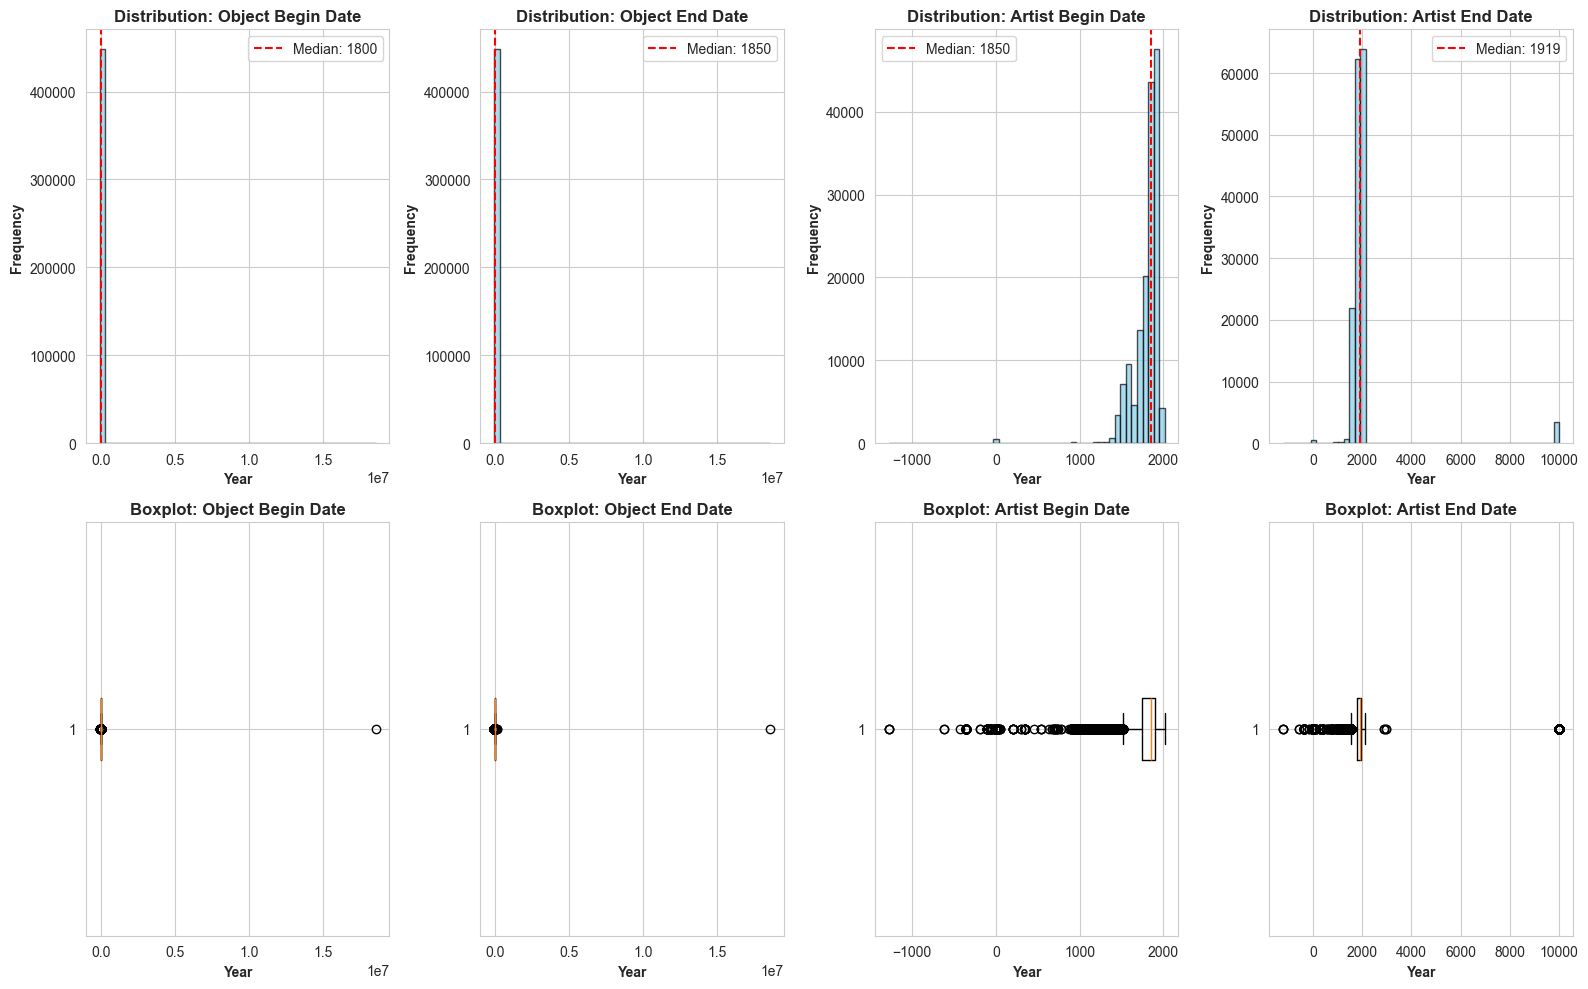

✓ Saved: numeric_distributions.png


In [11]:
# Cell 10: Visualize numeric distributions
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.ravel()

date_cols = ['Object Begin Date', 'Object End Date', 'Artist Begin Date', 'Artist End Date']

for idx, col in enumerate(date_cols):
    if col in df.columns:
        data = df[col].dropna()
        
        # Histogram
        axes[idx].hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel('Year', fontweight='bold')
        axes[idx].set_ylabel('Frequency', fontweight='bold')
        axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
        axes[idx].axvline(data.median(), color='red', linestyle='--', 
                         label=f'Median: {data.median():.0f}')
        axes[idx].legend()
        
        # Boxplot
        axes[idx+4].boxplot(data, vert=False)
        axes[idx+4].set_xlabel('Year', fontweight='bold')
        axes[idx+4].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: numeric_distributions.png")

## 1.3 — Data Quality Dimensions

### 1.3.1 — Completeness

In [12]:
# Cell 11: Completeness assessment
print("="*80)
print("SECTION 1.3: DATA QUALITY DIMENSIONS")
print("="*80)
print("\n1.3.1 - Completeness Assessment\n")

# Overall completeness
total_cells = df.shape[0] * df.shape[1]
filled_cells = df.count().sum()
completeness_score = (filled_cells / total_cells) * 100

print(f"📊 Overall Completeness: {completeness_score:.2f}%")
print(f"   • Total cells: {total_cells:,}")
print(f"   • Filled cells: {filled_cells:,}")
print(f"   • Missing cells: {total_cells - filled_cells:,}")

# Completeness by column category
print(f"\n📋 Completeness by Column Category:\n")

# Categorize columns
core_cols = ['Object ID', 'Object Number', 'Department', 'Object Name', 'Title']
metadata_cols = ['Is Highlight', 'Is Public Domain', 'Metadata Date', 'Repository']
artist_cols = [col for col in df.columns if 'Artist' in col]
geo_cols = ['Geography Type', 'City', 'State', 'County', 'Country', 'Region', 
            'Subregion', 'Locale', 'Locus', 'Excavation', 'River']
temporal_cols = ['Object Date', 'Object Begin Date', 'Object End Date']
descriptive_cols = ['Culture', 'Period', 'Dynasty', 'Reign', 'Medium', 
                    'Dimensions', 'Classification']

categories = {
    'Core Identifiers': core_cols,
    'Metadata': metadata_cols,
    'Artist Information': artist_cols,
    'Geographic': geo_cols,
    'Temporal': temporal_cols,
    'Descriptive': descriptive_cols
}

completeness_by_category = {}

for category, cols in categories.items():
    existing_cols = [c for c in cols if c in df.columns]
    if existing_cols:
        cat_completeness = (df[existing_cols].count().sum() / 
                           (len(df) * len(existing_cols))) * 100
        completeness_by_category[category] = cat_completeness
        print(f"   • {category:<25} {cat_completeness:>6.2f}%")

# Interpretation
print(f"\n💡 Interpretation:")
print(f"   • Core fields are mostly complete (critical for ML)")
print(f"   • Geographic and descriptive fields have high missingness")
print(f"   • This is expected for museum data (not all objects have all attributes)")

SECTION 1.3: DATA QUALITY DIMENSIONS

1.3.1 - Completeness Assessment

📊 Overall Completeness: 50.09%
   • Total cells: 19,272,729
   • Filled cells: 9,652,894
   • Missing cells: 9,619,835

📋 Completeness by Column Category:

   • Core Identifiers           98.48%
   • Metadata                  100.00%
   • Artist Information         39.93%
   • Geographic                  5.41%
   • Temporal                   98.84%
   • Descriptive                48.05%

💡 Interpretation:
   • Core fields are mostly complete (critical for ML)
   • Geographic and descriptive fields have high missingness
   • This is expected for museum data (not all objects have all attributes)


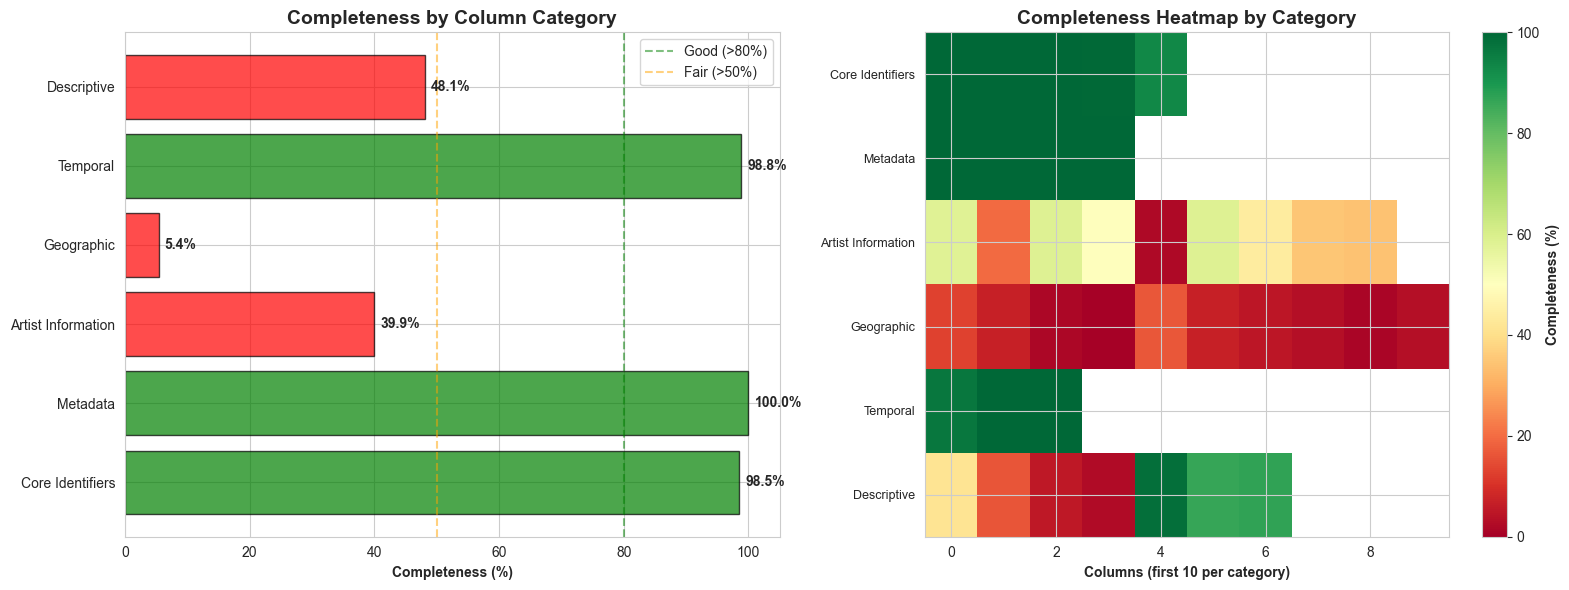

✓ Saved: completeness_analysis.png


In [13]:
# Cell 12: Visualize completeness
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Completeness by category
categories_list = list(completeness_by_category.keys())
scores = list(completeness_by_category.values())
colors = ['green' if s > 80 else 'orange' if s > 50 else 'red' for s in scores]

ax1.barh(categories_list, scores, color=colors, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Completeness (%)', fontweight='bold')
ax1.set_title('Completeness by Column Category', fontsize=14, fontweight='bold')
ax1.axvline(x=80, color='green', linestyle='--', alpha=0.5, label='Good (>80%)')
ax1.axvline(x=50, color='orange', linestyle='--', alpha=0.5, label='Fair (>50%)')
ax1.legend()

# Add value labels
for i, v in enumerate(scores):
    ax1.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

# Plot 2: Heatmap of completeness
completeness_matrix = []
for category, cols in categories.items():
    existing_cols = [c for c in cols if c in df.columns]
    if existing_cols:
        row = [(1 - df[col].isnull().mean()) * 100 for col in existing_cols[:10]]
        completeness_matrix.append(row + [np.nan] * (10 - len(row)))

ax2.imshow(completeness_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
ax2.set_yticks(range(len(categories)))
ax2.set_yticklabels(categories.keys(), fontsize=9)
ax2.set_xlabel('Columns (first 10 per category)', fontweight='bold')
ax2.set_title('Completeness Heatmap by Category', fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(ax2.images[0], ax=ax2)
cbar.set_label('Completeness (%)', fontweight='bold')

plt.tight_layout()
plt.savefig('completeness_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: completeness_analysis.png")

### 1.3.2 — Consistency

In [14]:
# Cell 13: Consistency checks
print("\n1.3.2 - Consistency Assessment\n")

consistency_issues = {}

# Check 1: Temporal consistency (Begin <= End)
print("🔍 Temporal Consistency Checks:\n")

# Object dates
obj_date_issues = df[(df['Object Begin Date'].notna()) & 
                     (df['Object End Date'].notna()) & 
                     (df['Object Begin Date'] > df['Object End Date'])]
consistency_issues['Object Date Order'] = len(obj_date_issues)
print(f"   • Object Begin > End: {len(obj_date_issues):,} violations")

# Artist dates
artist_date_issues = df[(df['Artist Begin Date'].notna()) & 
                        (df['Artist End Date'].notna()) & 
                        (df['Artist Begin Date'] > df['Artist End Date'])]
consistency_issues['Artist Date Order'] = len(artist_date_issues)
print(f"   • Artist Begin > End: {len(artist_date_issues):,} violations")

# Check 2: Logical consistency
print(f"\n🔍 Logical Consistency Checks:\n")

# Object ID should be unique
duplicate_ids = df['Object ID'].duplicated().sum()
consistency_issues['Duplicate Object IDs'] = duplicate_ids
print(f"   • Duplicate Object IDs: {duplicate_ids:,}")

# Department should not be empty for valid objects
dept_missing = df['Department'].isnull().sum()
consistency_issues['Missing Department'] = dept_missing
print(f"   • Missing Department: {dept_missing:,}")

# Check 3: Cross-field consistency
print(f"\n🔍 Cross-Field Consistency:\n")

# If Culture is Egyptian, Country should likely be Egypt
if 'Culture' in df.columns and 'Country' in df.columns:
    egyptian_culture = df[df['Culture'].str.contains('egypt', case=False, na=False)]
    egyptian_not_egypt = egyptian_culture[~egyptian_culture['Country'].str.contains('egypt', case=False, na=False)]
    consistency_issues['Egyptian Culture not in Egypt'] = len(egyptian_not_egypt)
    print(f"   • Egyptian culture but not Egypt country: {len(egyptian_not_egypt):,}")

# Summary
print(f"\n📊 Consistency Summary:")
total_issues = sum(consistency_issues.values())
print(f"   • Total consistency violations: {total_issues:,}")
print(f"   • Percentage of records affected: {(total_issues / len(df)) * 100:.2f}%")


1.3.2 - Consistency Assessment

🔍 Temporal Consistency Checks:

   • Object Begin > End: 195 violations
   • Artist Begin > End: 21 violations

🔍 Logical Consistency Checks:

   • Duplicate Object IDs: 0
   • Missing Department: 0

🔍 Cross-Field Consistency:

   • Egyptian culture but not Egypt country: 238

📊 Consistency Summary:
   • Total consistency violations: 454
   • Percentage of records affected: 0.10%


### 1.3.3 — Accuracy

In [15]:
# Cell 14: Accuracy assessment
print("\n1.3.3 - Accuracy Assessment\n")

print("⚠️  Accuracy Limitations:")
print("   • Cannot measure accuracy without ground truth")
print("   • No external reference dataset available")
print("   • Museum data is self-reported and curated")

print("\n🔍 Proxy Accuracy Checks:\n")

# Check for impossible values
accuracy_flags = {}

# Impossible dates (future dates)
future_objects = df[df['Object End Date'] > 2024]
accuracy_flags['Future Object Dates'] = len(future_objects)
print(f"   • Objects with future end dates: {len(future_objects):,}")

# Extremely old dates (before recorded history)
ancient_objects = df[df['Object Begin Date'] < -5000]
accuracy_flags['Extremely Ancient'] = len(ancient_objects)
print(f"   • Objects before 5000 BC: {len(ancient_objects):,} (may be valid)")

# Negative artist dates (BC)
bc_artists = df[df['Artist Begin Date'] < 0]
accuracy_flags['BC Artists'] = len(bc_artists)
print(f"   • Artists born BC: {len(bc_artists):,} (unusual but possible)")

print(f"\n💡 Note: These are flags for review, not definitive errors")


1.3.3 - Accuracy Assessment

⚠️  Accuracy Limitations:
   • Cannot measure accuracy without ground truth
   • No external reference dataset available
   • Museum data is self-reported and curated

🔍 Proxy Accuracy Checks:

   • Objects with future end dates: 237
   • Objects before 5000 BC: 1,891 (may be valid)
   • Artists born BC: 115 (unusual but possible)

💡 Note: These are flags for review, not definitive errors


### 1.3.4 — Other Dimensions

In [16]:
# Cell 15: Other DQ dimensions
print("\n1.3.4 - Other DQ Dimensions\n")

print("📋 Excluded Dimensions and Justification:\n")

excluded_dimensions = {
    'Timeliness': 'Dataset is historical; timeliness not critical for this ML task',
    'Believability': 'Museum data is authoritative; high inherent credibility',
    'Accessibility': 'Data is already accessible (CSV format); not a concern',
    'Relevance': 'All columns potentially relevant; will assess in cleaning phase',
    'Precision': 'Text data; precision not applicable'
}

for dimension, reason in excluded_dimensions.items():
    print(f"   • {dimension:<20} {reason}")

print(f"\n✓ Focus on: Completeness, Consistency, Validity (most relevant for this project)")


1.3.4 - Other DQ Dimensions

📋 Excluded Dimensions and Justification:

   • Timeliness           Dataset is historical; timeliness not critical for this ML task
   • Believability        Museum data is authoritative; high inherent credibility
   • Accessibility        Data is already accessible (CSV format); not a concern
   • Relevance            All columns potentially relevant; will assess in cleaning phase
   • Precision            Text data; precision not applicable

✓ Focus on: Completeness, Consistency, Validity (most relevant for this project)


## 1.4 — Summary of DQ Issues

SECTION 1.4: SUMMARY OF DATA QUALITY ISSUES

        Issue Category                                 Description Severity       Action Required
Structural Missingness                10 columns with >95% missing     High        Drop or impute
Temporal Inconsistency                   216 date order violations   Medium   Investigate and fix
        Duplicate Risk            0 potential duplicate Object IDs      Low     Verify uniqueness
       Class Imbalance           Department: 996:1 imbalance ratio     High    Handle in modeling
    Text Inconsistency Inconsistent text formatting (case, spaces)   Medium           Standardize
    Outliers/Anomalies             237 impossible/suspicious dates      Low Review and cap/remove


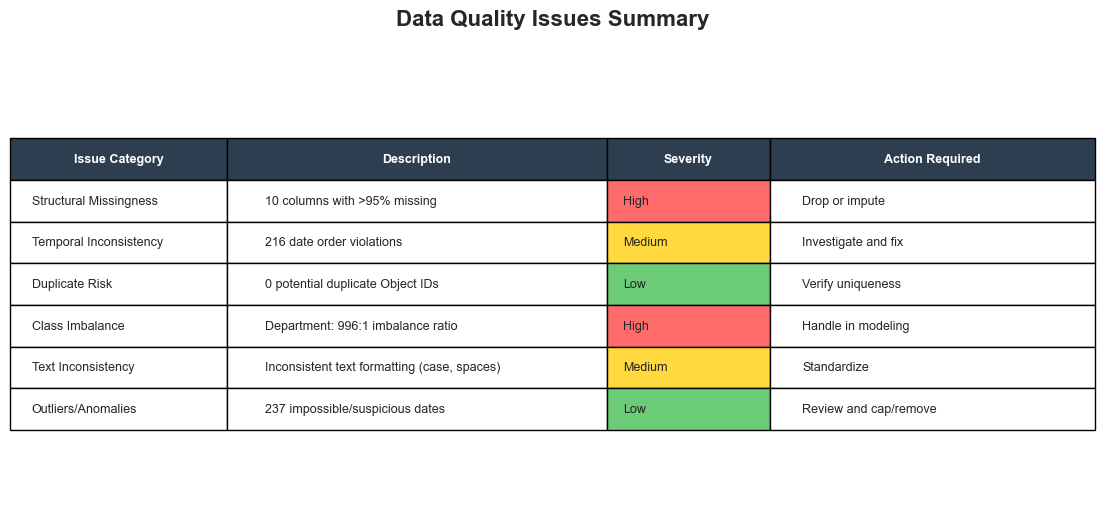


✓ Saved: dq_issues_summary.png


In [17]:
# Cell 16: Comprehensive DQ summary
print("="*80)
print("SECTION 1.4: SUMMARY OF DATA QUALITY ISSUES")
print("="*80)

dq_issues = {
    'Issue Category': [
        'Structural Missingness',
        'Temporal Inconsistency',
        'Duplicate Risk',
        'Class Imbalance',
        'Text Inconsistency',
        'Outliers/Anomalies'
    ],
    'Description': [
        f'{(missing_stats["Missing_Pct"] > 95).sum()} columns with >95% missing',
        f'{consistency_issues.get("Object Date Order", 0) + consistency_issues.get("Artist Date Order", 0):,} date order violations',
        f'{duplicate_ids:,} potential duplicate Object IDs',
        'Department: 996:1 imbalance ratio',
        'Inconsistent text formatting (case, spaces)',
        f'{len(future_objects):,} impossible/suspicious dates'
    ],
    'Severity': [
        'High',
        'Medium',
        'Low',
        'High',
        'Medium',
        'Low'
    ],
    'Action Required': [
        'Drop or impute',
        'Investigate and fix',
        'Verify uniqueness',
        'Handle in modeling',
        'Standardize',
        'Review and cap/remove'
    ]
}

dq_summary_df = pd.DataFrame(dq_issues)

print("\n" + dq_summary_df.to_string(index=False))

# Create visual summary
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('tight')
ax.axis('off')

# Color code by severity
def get_color(severity):
    return {'High': '#FF6B6B', 'Medium': '#FFD93D', 'Low': '#6BCB77'}[severity]

cell_colors = [[get_color(s) if i == 2 else 'white' 
                for i in range(len(dq_summary_df.columns))] 
               for s in dq_summary_df['Severity']]

table = ax.table(cellText=dq_summary_df.values,
                colLabels=dq_summary_df.columns,
                cellLoc='left',
                loc='center',
                cellColours=cell_colors,
                colWidths=[0.2, 0.35, 0.15, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)

# Style header
for i in range(len(dq_summary_df.columns)):
    table[(0, i)].set_facecolor('#2C3E50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title('Data Quality Issues Summary', fontsize=16, fontweight='bold', pad=20)
plt.savefig('dq_issues_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: dq_issues_summary.png")

In [18]:
# Cell 17: Final metrics dashboard
print("\n📊 FINAL DQ METRICS DASHBOARD\n")
print("="*80)

metrics = {
    'Metric': [
        'Overall Completeness',
        'Columns with >95% Missing',
        'Temporal Violations',
        'Duplicate IDs',
        'Target Variable Completeness',
        'Class Imbalance Ratio',
        'Records Analyzed'
    ],
    'Value': [
        f'{completeness_score:.2f}%',
        f'{(missing_stats["Missing_Pct"] > 95).sum()}',
        f'{consistency_issues.get("Object Date Order", 0) + consistency_issues.get("Artist Date Order", 0):,}',
        f'{duplicate_ids:,}',
        '100%',
        '996:1',
        f'{len(df):,}'
    ],
    'Status': [
        '⚠️  Fair',
        '⚠️  Action Needed',
        '⚠️  Needs Fixing',
        '✓ Good',
        '✓ Perfect',
        '⚠️  Challenging',
        '✓ Large Sample'
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df.to_string(index=False))
print("="*80)

print("\n🎯 KEY TAKEAWAYS:")
print("   1. Dataset is large and rich (448K+ records, 43 attributes)")
print("   2. Target variable (Department) is perfect (0% missing)")
print("   3. Significant structural missingness in optional fields")
print("   4. Some temporal inconsistencies need addressing")
print("   5. Severe class imbalance will require special handling")
print("   6. Overall: Good foundation for ML, but cleaning needed")

print("\n✅ Notebook 1 Complete!")
print("➡️  NEXT STEP: Proceed to Notebook 2 for data cleaning")


📊 FINAL DQ METRICS DASHBOARD

                      Metric   Value            Status
        Overall Completeness  50.09%          ⚠️  Fair
   Columns with >95% Missing      10 ⚠️  Action Needed
         Temporal Violations     216  ⚠️  Needs Fixing
               Duplicate IDs       0            ✓ Good
Target Variable Completeness    100%         ✓ Perfect
       Class Imbalance Ratio   996:1   ⚠️  Challenging
            Records Analyzed 448,203    ✓ Large Sample

🎯 KEY TAKEAWAYS:
   1. Dataset is large and rich (448K+ records, 43 attributes)
   2. Target variable (Department) is perfect (0% missing)
   3. Significant structural missingness in optional fields
   4. Some temporal inconsistencies need addressing
   5. Severe class imbalance will require special handling
   6. Overall: Good foundation for ML, but cleaning needed

✅ Notebook 1 Complete!
➡️  NEXT STEP: Proceed to Notebook 2 for data cleaning
